In [1]:
import nlopt
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import optlib.optical as opt

np.seterr(divide='ignore', invalid='ignore')

plt.rcParams.update({
#     "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams['font.size'] = 14
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib notebook

**Path to the directory containing Henke ionisation data (download from https://henke.lbl.gov/optical_constants/asf.html)**

In [2]:
#xraypath = '/path/to/Henke/data/'
xraypath = '/Users/olgaridzel/Research/Bruce/PHYSDAT/sf/'

In [3]:
A = [2.88,17.04,25.53,2.48,30.87,17.34,27.94,23,23.48,22.85,20.23,25.42,29,17.28,65.7,12.84,32.66,6.22]
gamma = [1.2,2,1.9,1.8,2.5,2.2,2.9,3.6,3.9,5,6.1,15.6,8.2,7.6,73.3,6.9,14.3,6.8]
omega = [6.6,8.5,9.7,10.2,10.8,12,13.3,14.8,16.6,18.7,21,22.9,24,28.1,32,32.5,37.3,50.1]
oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','n','o','p','h'], [39,13,24,4,49])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

dna_drude = opt.Material('DNA', oscillators, composition, eloss, q, xraypath)
dna_drude.Eg = 4.5
dna_drude.width_of_the_valence_band = 0.5
dna_drude.atomic_density = 0.087
dna_drude.electron_density = 0.2921
dna_drude.static_refractive_index = 1.48
dna_drude.Z = 4.85

In [4]:
fd = pd.read_csv('../diimfp/dna_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

In [5]:
opt_ = opt.OptFit(dna_drude, x_exp, y_exp, 1600)

In [7]:
result = opt_.runOptimisation("ndiimfp")

In [8]:
oscOptimised = opt_.vec2Struct(result)

In [9]:
print(f'A: {oscOptimised.oscillators.A}')
print(f'Gamma: {oscOptimised.oscillators.gamma}')
print(f'Omega: {oscOptimised.oscillators.omega}')

A: [ 2.83600434 29.43661895 24.89052723  4.38276177 25.55058244 17.61471205
 28.09257664 21.4447224  23.50489231 21.1713232  20.91719695 24.95582289
 29.8351809  17.4503505  60.92299786 13.38487814 30.31458003  6.06884884]
Gamma: [ 1.10560929  1.8807436   1.85797257  1.70724491  2.46843825  2.16727677
  3.01421107  3.58007313  3.8559144   5.0455833   6.1270829  15.5323554
  8.25868478  7.58295109 70.9279929   7.59321218 14.35800625  6.87248465]
Omega: [ 6.61837631  8.64949053  9.95136033 10.13197206 11.04686131 12.09595787
 13.41087304 14.86352576 16.62533513 18.67159452 20.79635622 22.97334265
 23.86603227 28.11738009 31.5347988  32.78404634 36.76677218 50.09338238]


<IPython.core.display.Javascript object>


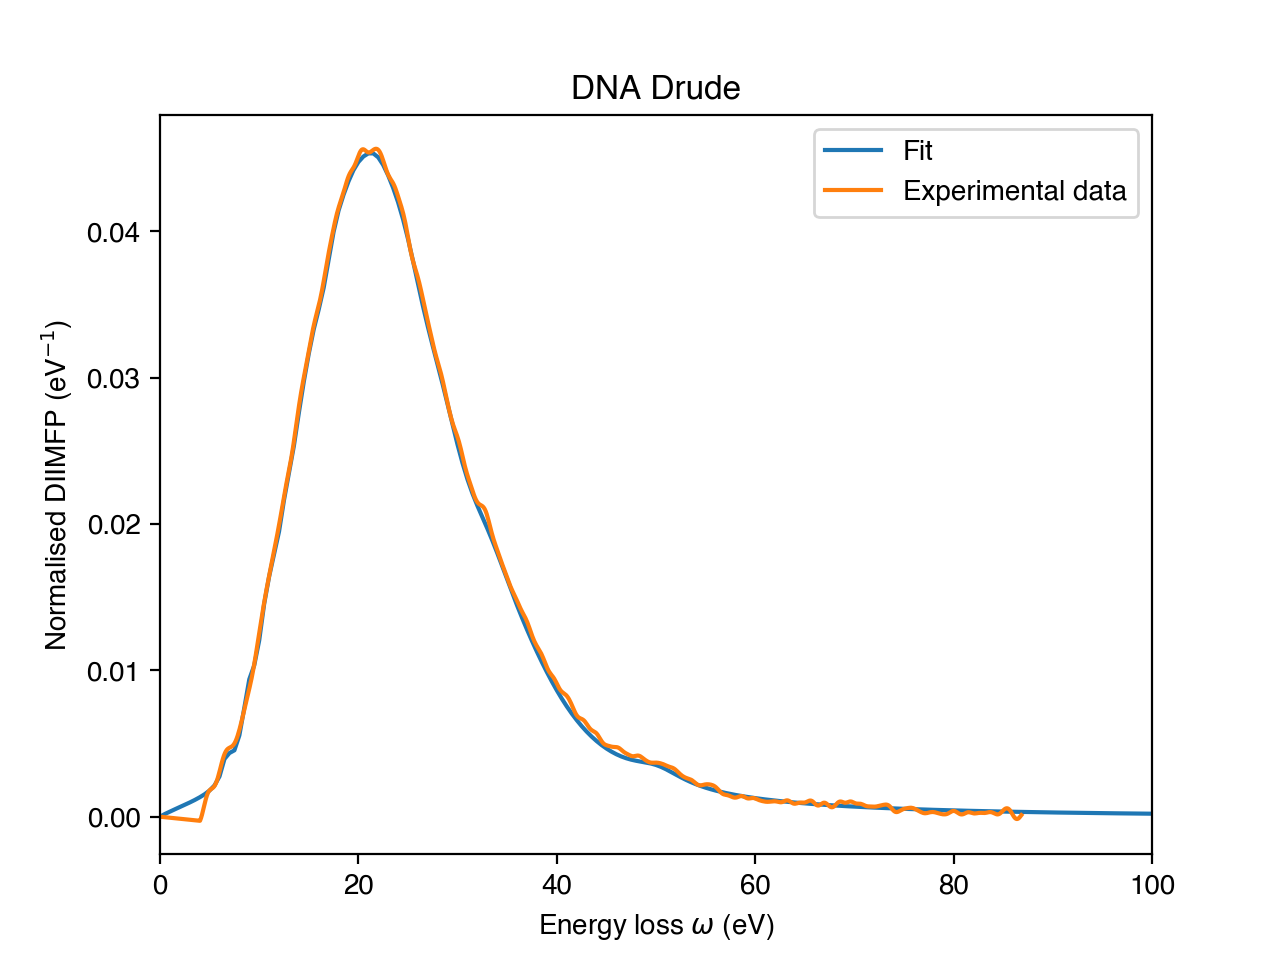

In [10]:
oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [11]:
fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 4.746675826256301
Z = 4.85
KKSum = 1.0946392713081303


<IPython.core.display.Javascript object>


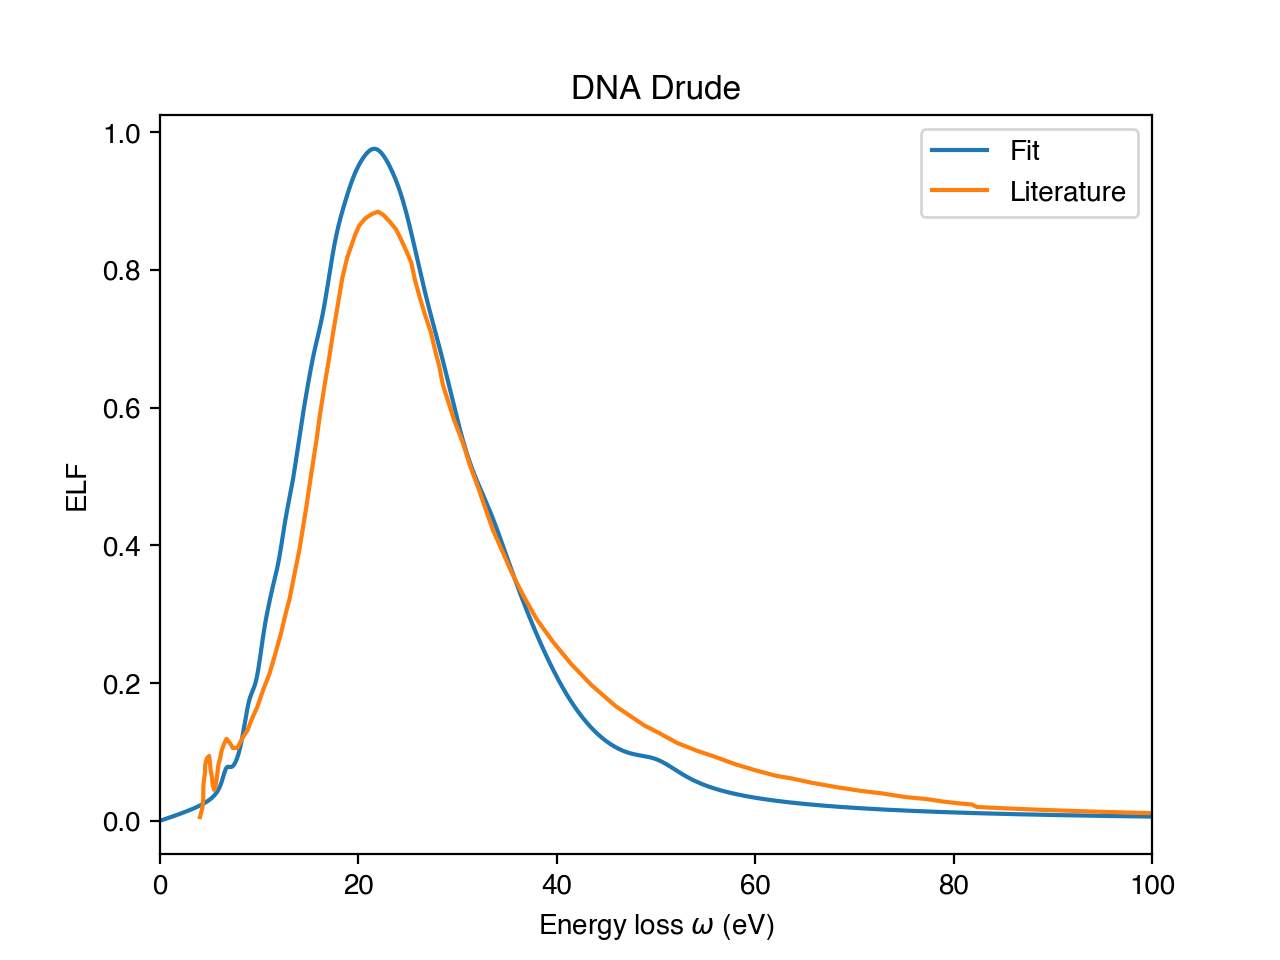

In [13]:
fd = pd.read_csv('../../MATLAB/organic/dna/dna_physdat_die.txt',header=None,sep=' ')
exp_elf = fd.values
oscOptimised.calculateELF()

plt.figure()
plt.plot(oscOptimised.eloss,oscOptimised.ELF,label='Fit')
plt.plot(exp_elf[:,0],exp_elf[:,3],label='Literature')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('ELF')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.xlim(0,100)
plt.legend()
plt.show()